[![Open notebook in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/afondiel/computer-vision-challenge/blob/main/L2_03_AI_Powered_Image_Restoration_and_Enhancement/notebooks/AI_Image_Restoration_Enhancement_T1_Image_Resolution.ipynb)

#  AI Image Restoration and Enhancement - Image Resolution

**Overview**

Focuses on improving the quality of an existing image by performing the following tasks:

- T1: **Image Resolution:** Increase image resolution
- T2: **De-noising:** Remove noise
- T3: **De-blurring:** Sharp blurry images
- T4: **Colorization:** Add color information to grayscale images
- T5: **Image Inpainting:** Reconstruct missing or damaged parts of an image

> **IMPORTANT:**\
> For the purpose of the entire project (**Computer Vision Challenge**), we leverage Pre-trained Model in order to make the project accessible to all while focusing on the performance and outcome of multiple models.

Please refer to this [Benchmarking](https://github.com/afondiel/computer-vision-challenge/blob/main/L2_03_AI_Powered_Image_Restoration_and_Enhancement/docs/Image_Restoration_Enhancement_Model_Benchmark.md) to see the top **10** models for each task.

## Task 1: Super-Resolution with ISR
- **Popular Datasets:** DF2K, FFHQ and CelebA-HQ
- **Custom Test Dataset:** [afondiel/dummy_images](https://huggingface.co/datasets/afondiel/dummy_images)
- **Models:** Image Super-Resolution (ISR)

#### Install Dependencies

In [ ]:
# Install ISR pre-trained model for Super-Resolution
!pip install ISR --no-deps

## Install pytorch multimodality libraries & torch framework
!pip install torch torchvision torchaudio fastai -U

## Install Hugging Face Libraries
!pip install transformers datasets timm -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.1/779.1 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 46.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 44.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1

In [ ]:
# Import necessary libraries
from ISR.models import RDN
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO
from IPython.display import display
# solve bug cv2.imshow
from google.colab.patches import cv2_imshow


#### Load public Datasets from  Hugging Face
> **IMPORTANT**:
> HF may require a token for secure dataset access. Follow the instructions below to load your own valid token if needed.

In [ ]:
# from huggingface_hub import notebook_login, login
# Authenticate with Hugging Face Hub (choose one of the options)

# 1. Interactive login (recommended for notebooks)
# notebook_login()  # This will open a browser window for login

# 2. Non-interactive login (if you have the token ready)
# login(token="HF_TOKEN_W")

#### Preprocessing

In [ ]:
from datasets import load_dataset, Dataset, DatasetDict

# Load the dataset
ds = load_dataset("afondiel/dummy_images")
print(ds)
# $$$ DEBUG $$$$
# print(ds.items())
# print(ds['test'])
# print(type(ds['test']))
# print(ds['test'].features['index'])
# print(ds['test'].features['image'])
# print(ds['test'].num_rows)
# print(type(ds))


DatasetDict({
    test: Dataset({
        features: ['index', 'image'],
        num_rows: 6
    })
})


#### Extract images

In [ ]:
image_list = []

for idx, example in enumerate(ds['test']):
  id = example['index'] ## features == examples
  im = example['image']
  print(id)
  print(im)

  if isinstance(im, str):
      img = Image.open(im)
  elif isinstance(im, dict):
      img = Image.open(BytesIO(requests.get(im['path']).content))
  # Handle the case when 'im' is already a PIL Image
  elif isinstance(im, Image.Image):
      img = im
  else:
      raise ValueError("Invalid image format")

  # Append the image to the list
  image_list.append(img)


0
<PIL.Image.Image image mode=RGB size=1024x1024 at 0x7D89669DA980>
1
<PIL.PngImagePlugin.PngImageFile image mode=L size=200x200 at 0x7D89669D9E70>
2
<PIL.Image.Image image mode=RGB size=1024x1024 at 0x7D89647E9E40>
3
<PIL.PngImagePlugin.PngImageFile image mode=P size=512x480 at 0x7D89647E9EA0>
4
<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=2011x2283 at 0x7D896474E590>
5
<PIL.PngImagePlugin.PngImageFile image mode=RGB size=1024x1024 at 0x7D896478D2D0>


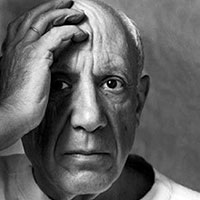

In [ ]:
# display(image_list[0])
display(image_list[1])
picasso = image_list[1]

In [ ]:
# convert grayscale images to numpy array
# input_img = np.array(image_list[0])
input_img = np.array(picasso)
print(f"input_img-shape:{input_img.shape}\ninput_img:{input_img}")

input_img-shape:(200, 200)
input_img:[[108 107 102 ... 139 141 142]
 [103 102  97 ... 139 141 141]
 [100  98  93 ... 140 140 139]
 ...
 [138 134 135 ... 239 239 240]
 [139 140 138 ... 249 247 247]
 [142 146 143 ... 245 248 251]]


#### Download your own image/photos

In [ ]:
# Download the image using curl + opencv
# !curl -o logo.png https://colab.research.google.com/img/colab_favicon_256px.png
# !curl -o hendrix.jpg https://i.etsystatic.com/23861797/r/il/183b6d/3594587418/il_570xN.3594587418_fqp8.jpg

# # input_img = cv2.imread('logo.png')
# input_img = cv2.imread('hendrix.jpg')
# cv2_imshow(input_img)

#### Inference the ISR pretrained model

In [ ]:
# Inference the ISR pretrained model
if len(input_img.shape) == 2:  # Check if the image is grayscale
    input_img = cv2.cvtColor(input_img, cv2.COLOR_GRAY2RGB)  # Convert to color
elif len(input_img.shape) == 3 and input_img.shape[2] == 3:  # Check if it's already color (BGR)
    input_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB

# Super-Resolution with ISR
rdn = RDN(weights='psnr-small')
sr_img = rdn.predict(input_img)

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


1/1 [==============================] - 6s 6s/step


In [ ]:
print(f"input_img-shape:{input_img.shape}\nsr_img-shape:{sr_img.shape}")
# print(f"sr_img-shape:{sr_img.shape}\nsr_img:{sr_img}")

input_img-shape:(200, 200, 3)
sr_img-shape:(400, 400, 3)


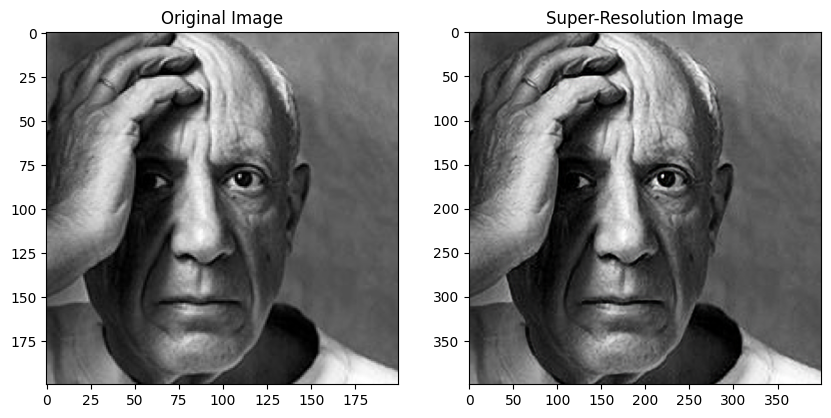

In [ ]:
""" Expected results: the sr_img-shape (resolution) shall be bigger than input_img-shape, therefore with a bette quality*
\\\ input_img-shape:(X, Y, 3)
\\\ sr_img-shape:(X*magnitude, Y*magnitude, 3)
"""
# Display the result
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(input_img)
plt.subplot(1, 2, 2)
plt.title('Super-Resolution Image')
plt.imshow(sr_img)
plt.show()

## Next step

> Check out the other tasks, T2, T3, and T4, in the current repository.

> Feel free to try one of the model in this [Benchmarking](https://github.com/afondiel/computer-vision-challenge/blob/main/L2_03_AI_Powered_Image_Restoration_and_Enhancement/docs/Image_Restoration_Enhancement_Model_Benchmark.md) document, based on the task you to perform to see, different results.
- To use the model, follow these steps:
  1. Download the pre-trained model from GitHub or Hugging Face Hub.
  2. Install all required dependencies.
  3. You're ready to go!

> Please contact me if you have any questions.

## References
**Docs:**

- [AI Image Restoration](https://en.wikipedia.org/wiki/Image_restoration_by_artificial_intelligence)
- *Denoising:*
  - [Brief review of image denoising techniques](https://vciba.springeropen.com/articles/10.1186/s42492-019-0016-7)
  - [Denoising Techniques - Basics](https://iq.opengenus.org/image-denoising-and-image-processing-techniques/)
  - [Methods for image denoising using **CNN** - 2021](https://d-nb.info/1242356061/34)

**Datasets:**

- [Awesome Datasets for Super-Resolution: Introduction and Pre-processing - 2023](https://openmmlab.medium.com/awesome-datasets-for-super-resolution-introduction-and-pre-processing-55f8501f8b18)

ISR:
- DIV2K

[Enhanced Deep Residual Networks for Single Image Super-Resolution - paper](https://arxiv.org/pdf/1707.02921)
- DF2K

Real-ESRGAN:
- DF2K_OST

face super resolution:
- [FFHQ](https://paperswithcode.com/dataset/ffhq) and [CelebA-HQ](https://)

**Models:**

ISR Resources:
- [Image Super Resolution (ISR) github project with tf](https://github.com/idealo/image-super-resolution)
- [Paper with Code:](https://paperswithcode.com/paper/residual-dense-network-for-image-super)
  - paper: [Residual Dense Network for Image Super-Resolution CVPR 2018](https://openaccess.thecvf.com/content_cvpr_2018/papers/Zhang_Residual_Dense_Network_CVPR_2018_paper.pdf)

  - code: [RDN - @yulunzhang](https://github.com/yulunzhang/RDN)

Denoising:

Resnet
- [Resnet18 paper - Deep Residual Learning for Image Recognition: @Microsoft Research](https://arxiv.org/pdf/1512.03385)
- [U-Net Explained - paper with Code](https://paperswithcode.com/method/u-net)

Real-ESRGAN:
- Paper: [Real-ESRGAN: Training Real-World Blind Super-Resolution with Pure Synthetic Data](https://arxiv.org/pdf/2107.10833)
- [HF Space](https://huggingface.co/spaces/akhaliq/Real-ESRGAN)


Inpainting:

Deoldify:
- [deoldify.ai](https://deoldify.ai/)
- [colorizer](https://deepai.org/machine-learning-model/colorizer)

ESRGAN:

[Enhanced Super-Resolution Generative Adversarial Networks - paper 2018](https://arxiv.org/pdf/1809.00219)